In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import copy
import networkx as nx

%matplotlib inline

In [2]:
snp = pd.read_csv(r"../data/snp_allstocks_2015_2019.csv", index_col = 0)
idx = ["MSFT", "AAPL", "AMZN", "FB", "JNJ", "GOOG", "GOOGL", "BRK-B", "PG", "JPM"]
px = copy.deepcopy(snp[idx])
px = px.sample(frac=1)

In [3]:
logpx = np.log(px)
simp_ret = px.pct_change( )
log_ret = logpx.diff()
# log_ret = log_ret.sample(frac=1)
# logret["MSFT"].plot()

In [4]:
# logpx

,MSFT,AAPL,AMZN,FB,JNJ,GOOG,GOOGL,BRK-B,PG,JPM
Date,,,,,,,,,,
2016-11-14,4.062510,4.660699,6.577959,4.745628,4.758749,6.601339,6.624357,5.062152,4.418841,4.375883
2017-09-15,4.321613,5.074424,6.894457,5.145399,4.901192,6.824689,6.840857,5.192346,4.535498,4.517650
2018-08-20,4.671613,5.372775,7.537276,5.150397,4.919105,7.096531,7.108203,5.339747,4.426522,4.741622
2016-04-07,3.997466,4.687119,6.382543,4.733036,4.693822,6.607029,6.633476,4.947411,4.421728,4.048650
2017-05-05,4.234107,5.003678,6.839637,5.012234,4.816322,6.832094,6.856757,5.115296,4.460144,4.465908
...,...,...,...,...,...,...,...,...,...,...
2015-07-27,3.814410,4.810313,6.275534,4.545102,4.587821,6.441361,6.489615,4.946772,4.381652,4.219655
2017-06-09,4.253056,5.003812,6.885827,5.007965,4.879235,6.856283,6.877420,5.135798,4.479153,4.465448
2018-07-19,4.648230,5.256870,7.502722,5.337971,4.835806,7.079151,7.089327,5.285688,4.366024,4.699480


In [5]:
corr = log_ret.cov()
# corr = px.corr()
# corr = simp_ret.corr()
corr

,MSFT,AAPL,AMZN,FB,JNJ,GOOG,GOOGL,BRK-B,PG,JPM
MSFT,0.188916,0.128214,0.294389,0.153305,0.068925,0.148416,0.143482,0.092625,0.010210,0.141117
AAPL,0.128214,0.113204,0.189268,0.096527,0.044943,0.094010,0.090500,0.070041,0.006590,0.105285
AMZN,0.294389,0.189268,0.485000,0.252187,0.108438,0.241435,0.234427,0.138771,0.011097,0.218045
FB,0.153305,0.096527,0.252187,0.156537,0.063968,0.134739,0.130994,0.073753,0.011533,0.118598
JNJ,0.068925,0.044943,0.108438,0.063968,0.033714,0.057064,0.055072,0.036591,0.010933,0.053037
GOOG,0.148416,0.094010,0.241435,0.134739,0.057064,0.126701,0.123143,0.069974,0.008336,0.110312
GOOGL,0.143482,0.090500,0.234427,0.130994,0.055072,0.123143,0.119848,0.067150,0.007860,0.106579
BRK-B,0.092625,0.070041,0.138771,0.073753,0.036591,0.069974,0.067150,0.051934,0.008011,0.075462
PG,0.010210,0.006590,0.011097,0.011533,0.010933,0.008336,0.007860,0.008011,0.010467,0.008301
JPM,0.141117,0.105285,0.218045,0.118598,0.053037,0.110312,0.106579,0.075462,0.008301,0.118440


In [6]:
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
# links


In [7]:
links_filtered=links.loc[ (links['value'] > 0.6) & (links['var1'] != links['var2']) ]
# links_filtered


In [8]:
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')


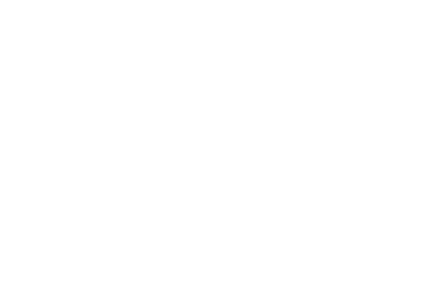

In [9]:
nx.draw(G, with_labels=True, node_color='orange', node_size=800, edge_color='black', linewidths=1, font_size=15)

